# Notebook Describing Chemical Potential Modifications to Original Code

Everything in this notebook was also done in irreducible_library.py

In [9]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import scipy
import math
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.optimize import brentq
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
import irreducible_library as irr
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:71: RuntimeWarning: overflow encountered in exp
  2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp(E/T)+1), me, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:55: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:120: RuntimeWarning: overflow encountered in exp
  *1/(1+np.exp(np.sqrt(p**2+me**2)/T))
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:145: RuntimeWarning: overflow encountered in exp
  *1/(1+np.exp(np.sqrt(p**2+me**2)/T))


# Thermo, Clocks, Hubble

In [2]:
#everything in units where c=hbar=1 and the energies are in MeV
me = 0.511
mmu=105.658
alpha_em = 1/137.
e = np.sqrt(alpha_em*4*np.pi)
Mpl = 2.435e21 #reduced planck mass (i.e. factor of 8 pi)
cm2_conv = 2.5e21

def nxrelic(mx, T):
    """
    This computes the number density of dark matter at a certain temperature. Assuming an mx.
    """
    return 4.35e-7 /mx  * 2 *np.pi**2 *T**3* (2 + 7/8 * 6* 4/11)/45

def rho_gamma(T):
    """
    energy density of plasmons. 
    """
    return np.pi**2 * T**4/15.
def p_gamma(T):
    """
    pressure density of plasmons.
    """
    return rho_gamma(T)/3.
def s_gamma(T):
    """
    entropy density of plasmons.
    """
    return 4 * rho_gamma(T)/(3.* T)

# The temperature for the following function is the temperature of the neutrinos.

def rho_nu(T):
    """
    energy density of neutrinos.
    """
    return 6*7/8*np.pi**2*T**4/(30.)

### Chemical Potential Incorporation

I am using the Saha equation to find n_(e+e-) up until recombination. I then evolve the chemical potential in 3 regimes:
1. Relativistic
mu = 0
2. Classical
From Braten and Siegel
mu = T*np.log((ne_total(T)*np.sqrt(2*np.pi**3))/((me*T)**(3/2)*(1+(15*T)/(8*me))))+me
3. After Recombination
The chemical potential at recombination is evolved with expansion
mu = me + (0.5109871506712876-me)*(T/10**(-6.5))

In [20]:
Tlist = np.logspace(3,-10,num=1000)
h = 0.67
Omegab = 0.05
eta = 5.5 * 10**(-10)*h**2*Omegab/0.02
BH = 13.6 * 10 ** (-6)
me = 0.511
RZetaThree = 1.202056903
def nb(T):
    return eta * 2 * 1.38 * T**3

def n_e_Full(T):
    return fsolve(lambda ne:\
    (ne/nb(T) - 1 + (ne/(nb(T)*np.pi))**2 * eta * 2 * RZetaThree * (2 * np.pi * T / me)**(3/2) * np.exp(BH/T)), nb(T))

n_elist = np.array([n_e_Full(i)[0] for i in Tlist])
ne_total = interp1d(Tlist, n_elist)

def mu_e(T):
    if T > 0.0222:
        return 0
    if T <= (10**(-6.5)):
        return me + (0.5109871506712876-me)*(T/10**(-6.5))
    else:
        return T*np.log((ne_total(T)*np.sqrt(2*np.pi**3))/((me*T)**(3/2)*(1+(15*T)/(8*me))))+me
    
mu_elist = np.array([mu_e(i) for i in Tlist])
ue = interp1d(Tlist, mu_elist)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/1117885314.py:13: RuntimeWarning: overflow encountered in exp
  (ne/nb(T) - 1 + (ne/(nb(T)*np.pi))**2 * eta * 2 * RZetaThree * (2 * np.pi * T / me)**(3/2) * np.exp(BH/T)), nb(T))
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


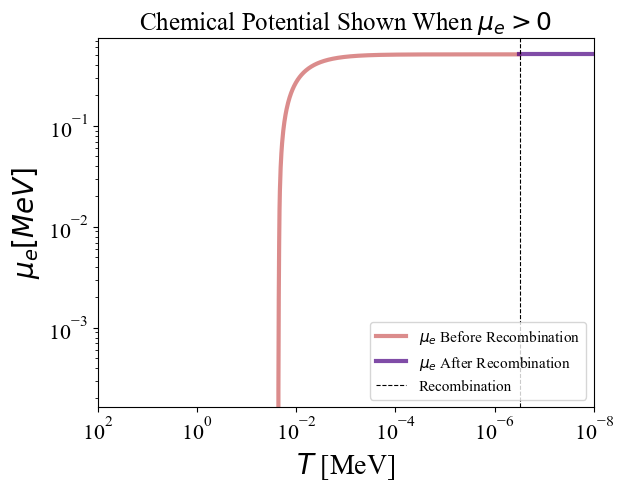

In [8]:
Tlist1 = np.logspace(1,-6.5,num=1000)
Tlist2 = np.logspace(-6.5,-8,num=1000)
f, ax = plt.subplots()

ax.loglog(Tlist1, [ue(i) for i in Tlist1],lw=3,c='indianred',alpha = 0.7,label = '$\mu_e$ Before Recombination')
ax.loglog(Tlist2, [ue(i) for i in Tlist2],lw=3,c='indigo',alpha = 0.7,label = '$\mu_e$ After Recombination')
plt.axvline(x=0.3*10**(-6), color='k', linestyle='--', linewidth=0.8, label = "Recombination")

ax.set_ylabel(r'$\mu_e [MeV]$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'Chemical Potential Shown When $\mu_e>0$', fontsize=18)
ax.set_xlim([100,10**(-8)])
#ax.set_ylim([10e-15, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend(loc='lower right',fontsize=11)

In [11]:
def n_e(T):
    """
    number density of electrons
    """
    integral= scipy.integrate.quad(lambda E: \
    2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)
    return integral[0]

def p_e(T):
    """
    pressure density of electron
    """
    integral= scipy.integrate.quad(lambda E: \
    2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp((E-ue(T))/T)+1), me, np.inf)
    return integral[0]

def rho_e(T):
    """
    energy density of electrons
    """

    integral= scipy.integrate.quad(lambda E: \
    2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)
    return integral[0]

def s_e(T):
    """
    entropy density of electron
    """
    return (p_e(T)+rho_e(T))/T

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:23: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:6: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:63: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:14: RuntimeWarning: overflow encountered in exp
  2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp((E-ue(T))/T)+1), me, np.inf)


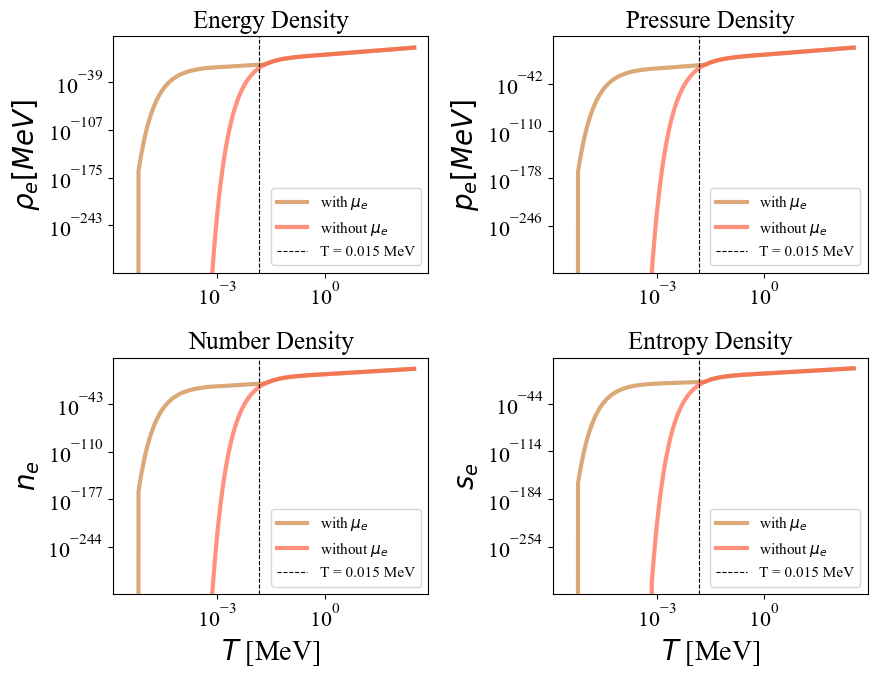

In [12]:
Tlist = np.logspace(2.5,-5.5,num=1000)
f, ax = plt.subplots(2,2)
f.set_figwidth(9)
f.set_figheight(7)

ax[0][0].loglog(Tlist, [rho_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
ax[0][0].loglog(Tlist, [irr.rho_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0][0].axvline(x=0.015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.015 MeV")

ax[0][0].set_ylabel(r'$\rho_e [MeV]$', fontsize=20)
#ax[0][0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0][0].set_title(r'Energy Density', fontsize=18)
ax[0][0].xaxis.set_tick_params(labelsize=16)
ax[0][0].yaxis.set_tick_params(labelsize=16)

ax[0][0].legend(loc='lower right',fontsize=11)

ax[1][0].loglog(Tlist, [n_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
ax[1][0].loglog(Tlist, [irr.n_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[1][0].set_ylabel(r'$n_e$', fontsize=20)
ax[1][0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[1][0].axvline(x=0.015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.015 MeV")
ax[1][0].set_title(r'Number Density', fontsize=18)
ax[1][0].xaxis.set_tick_params(labelsize=16)
ax[1][0].yaxis.set_tick_params(labelsize=16)

ax[1][0].legend(loc='lower right',fontsize=11)

ax[0][1].loglog(Tlist, [p_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
ax[0][1].loglog(Tlist, [irr.p_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0][1].set_ylabel(r'$p_e [MeV]$', fontsize=20)
#ax[0][1].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0][1].axvline(x=0.015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.015 MeV")
ax[0][1].set_title(r'Pressure Density', fontsize=18)
ax[0][1].xaxis.set_tick_params(labelsize=16)
ax[0][1].yaxis.set_tick_params(labelsize=16)

ax[0][1].legend(loc='lower right',fontsize=11)

ax[1][1].loglog(Tlist, [s_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
ax[1][1].loglog(Tlist, [irr.s_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[1][1].axvline(x=0.015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.015 MeV")
ax[1][1].set_ylabel(r'$s_e$', fontsize=20)
ax[1][1].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[1][1].set_title(r'Entropy Density', fontsize=18)
ax[1][1].xaxis.set_tick_params(labelsize=16)
ax[1][1].yaxis.set_tick_params(labelsize=16)

ax[1][1].legend(loc='lower right',fontsize=11)
plt.tight_layout()
plt.show()

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:14: RuntimeWarning: overflow encountered in exp
  2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp((E-ue(T))/T)+1), me, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:23: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)


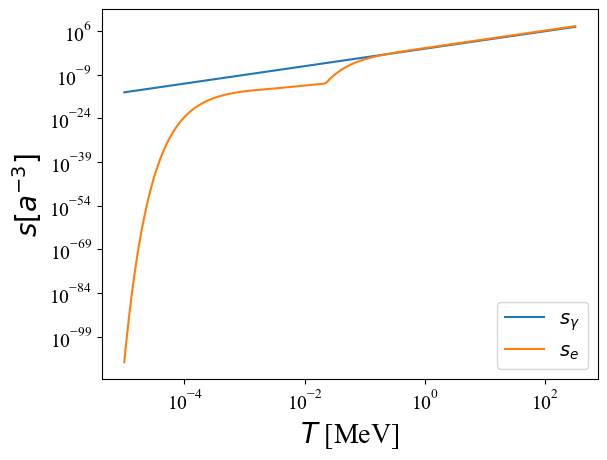

In [18]:
f, ax=plt.subplots()
Tlist = np.logspace(2.5,-5, num=200)
ax.loglog(Tlist, [s_gamma(i) for i in Tlist],label='$s_\gamma$')
ax.loglog(Tlist, [s_e(i) for i in Tlist],label='$s_e$')
#ax.loglog(Tlist, [nxrelic(100,i) for i in Tlist],label='$m_\chi = 100 MeV$')
#ax.set_xlim([1,2e3])
#ax.set_ylim([1e-3,40])
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$s [a^{-3}]$',fontsize=20)
ax.legend()
plt.show()

In [21]:
# SECTION FOR CONVERTING BETWEEN a AND T
# Include chemical potential of electrons here.

s_const = (s_e(10)+s_gamma(10))/(10.0591)**3 #define a=1 at T= 1 MeV

def T_full(a):
    """
    Tracking entropy to convert between a and T. 
    """
    return fsolve(lambda T:\
    (s_e(T)+s_gamma(T))*a**3 - s_const, 1/a)

alist = np.logspace(2.5, -2.5, num=1000)
Tfull_list = np.array([T_full(i)[0] for i in alist])
T = interp1d(alist, Tfull_list)

def a_full(T):
    return fsolve(lambda a:\
    (s_e(T)+s_gamma(T))*a**3 - s_const, 1/T)

Tlist = np.logspace(2.5, -2.5, num=1000)
afull_list = np.array([a_full(i)[0] for i in Tlist])
a = interp1d(Tlist, afull_list)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:14: RuntimeWarning: overflow encountered in exp
  2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp((E-ue(T))/T)+1), me, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:23: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)


Text(1.5, 0.05, '$T\\sim (11/4)^{1/3} a^{-1}$')

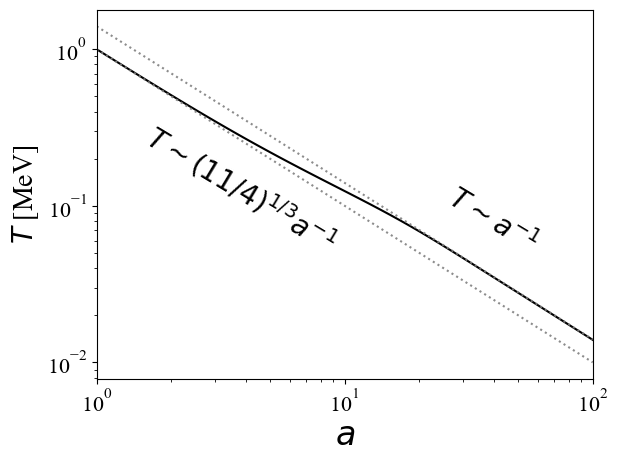

In [22]:
f, ax = plt.subplots()

alist = np.logspace(0, 2)
Tlist = np.logspace(2, -2)

ax.loglog(alist, T(alist),c='black')
ax.loglog(alist, 1/alist, c="gray", alpha=0.9, ls=":")
#ax.semilogx(Tlist, Tlist*a(Tlist))
ax.loglog(alist, (11/4.)**(1/3.)/alist, c="gray", alpha=0.9, ls=":")
#ax.set_xticklabels([0,1,10])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30])
#ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30])
ax.set_xlim([1, 100])
#ax.set_ylim([0.02, 2])
ax.set_ylabel(r'$T$ [MeV]', fontsize=20)
ax.set_xlabel(r'$a$', fontsize=24)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.text(25, 0.05, r'$T\sim a^{-1}$', rotation=-31,fontsize=20)
ax.text(1.5, 0.05, r'$T\sim (11/4)^{1/3} a^{-1}$', rotation=-31,fontsize=20)

#plt.savefig("temp_evolve.pdf",bbox_inches='tight')

In [ ]:
def H_full(aH):
    """
    hubble parameter. We can see the neutrino energy density doesn't really matter.
    """
    TH = T(aH)
    return np.sqrt((rho_gamma(TH)+rho_e(TH)+rho_nu(10)*(a(10)/aH)**4)/(3*Mpl**2))

alist = np.logspace(2.5, -2.5, num=5000)
Hfull_list = np.array([H_full(i) for i in alist])
H = interp1d(alist, Hfull_list)

# Plasma Things

In [23]:
def wp_full(T): #flag to make draft more clear about factor of 2
    # Add chemical potential
    """
    plasma frequency. Added in chemical potential of electrons to the occupancy function.
    """
    integral = integrate.quad(lambda p: 8*alpha_em/np.pi\
                *p**2/np.sqrt(p**2+me**2)*(1 - p**2/(3*(p**2+me**2)))\
                *1/(1+np.exp((np.sqrt(p**2+me**2)-ue(T))/T))
                              , 0, np.inf)
    return np.sqrt(integral[0])

Tlist = np.logspace(2.5, -2.5, num=500)
wp_list = np.array([wp_full(i) for i in Tlist])
wp = interp1d(Tlist, wp_list)

def wp_high(T):
    """
    High temp plasma frequency behaviour.
    """
    return np.sqrt(4*np.pi*alpha_em* T**2/9)

def wp_low(T):
    """ 
    Low temp behaviour.
    """
    return np.sqrt(4*np.pi*alpha_em*n_e(T)/me)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/4138740883.py:8: RuntimeWarning: overflow encountered in exp
  *1/(1+np.exp((np.sqrt(p**2+me**2)-ue(T))/T))


/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3009335637.py:6: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp((E-ue(T))/T)+1), me, np.inf)


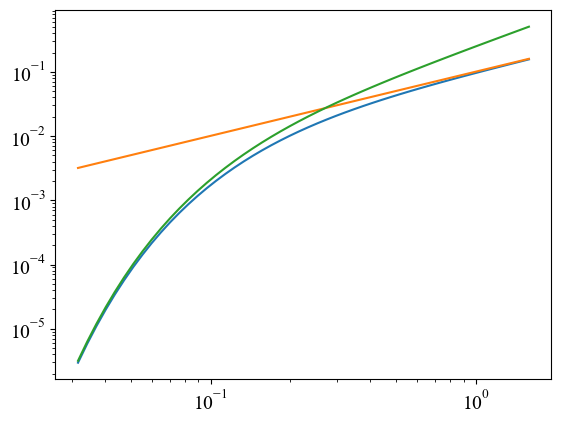

In [26]:
f, ax = plt.subplots()
Tlist = np.logspace(0.2, -1.5)

ax.loglog(Tlist, wp(Tlist))#[wp(i) for i in Tlist])
ax.loglog(Tlist, wp_high(Tlist))#[ for i in Tlist])
ax.loglog(Tlist, [wp_low(i) for i in Tlist])

In [27]:
def w1_full(T):
    # chemical potential
    integral = integrate.quad(lambda p: 8*alpha_em/np.pi\
                *p**2/np.sqrt(p**2+me**2)*\
                (5*p**2/(3*(p**2+me**2))-p**4/((p**2+me**2)**2))\
                *1/(1+np.exp((np.sqrt(p**2+me**2)-ue(T))/T))
                              , 0, np.inf)
    return np.sqrt(integral[0])

Tlist = np.logspace(2.5, -2.5, num=500)
w1_list = np.array([w1_full(i) for i in Tlist])
w1 = interp1d(Tlist, w1_list)

def vstar(T):
    """ 
    Typical velocity of electron in the plasma.
    """
    return w1(T)/wp(T)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_14079/3545505884.py:6: RuntimeWarning: overflow encountered in exp
  *1/(1+np.exp((np.sqrt(p**2+me**2)-ue(T))/T))


(0.0, 1.05)

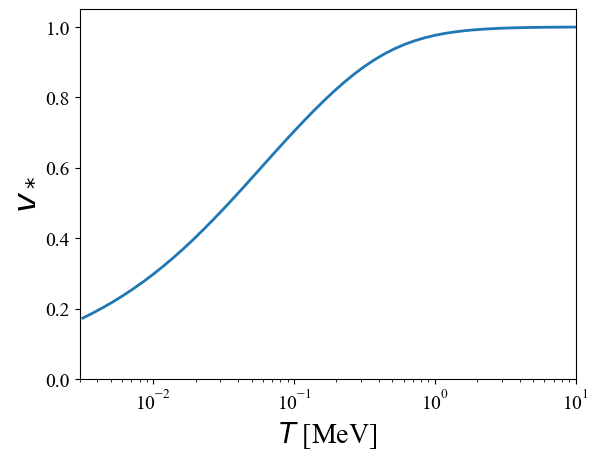

In [28]:
f, ax = plt.subplots()
Tlist = np.logspace(1, -2.5)

ax.semilogx(Tlist, vstar(Tlist), lw=2)#(i) for i in Tlist])
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_ylabel(r'$v_*$', fontsize=24)
ax.set_xlim([0.003, 10])
ax.set_ylim([0, 1.05])

In [ ]:
# Bunch of stuff from Braten and Siegel

def Pi_ell(T, k, omega):
    wpP = wp(T)
    vs = vstar(T)
    return 3*wpP**2/vs**2 *(omega/(2*vs*k)*\
            np.log((omega + vs*k)/(omega- vs*k))-1)

def Pi_t(T, k, omega):
    wpP = wp(T)
    vs = vstar(T)
    return 3*wpP**2/(2*vs**2)*(omega**2/k**2 \
    -omega*(omega**2-vs**2*k**2)/(2*vs*k**3)\
    *np.log((omega + vs*k)/(omega- vs*k)))

def kmax(T):
    wpP = wp(T)
    vs = vstar(T)
    return np.sqrt(3/vs**2* (1/(2*vs)*np.log((1+vs)/(1-vs))-1))*wpP

def omega_ell(T, k):
    if type(k)==int or type(k)== float or type(k)== np.float64:
        if k>kmax(T):
            return 0
        else:
            return fsolve(lambda w: Pi_ell(T, k, w)-k**2, k)
    else:
        km = kmax(T)
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            if k[i] < km:
                kudu[i] = fsolve(lambda w: Pi_ell(T, k[i], w)-k[i]**2, k[i])
        return kudu
    
def omega_t(T, k):
    return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)

def m_ell(T, k):
    if type(k) == int or type(k) == float or type(k)== np.float64:
        if k>kmax(T):
            return 0
        else:
            return np.sqrt(omega_ell(T, k)**2 - k**2)
        
    else:
        km = kmax(T)
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            if k[i] < km: 
                kudu[i] = np.sqrt(omega_ell(T, k[i])**2 - k[i]**2)
        return kudu
    
def m_t(T, k):
    """ 
    This is m_t from equation 2 in the paper
    """
    return np.sqrt(omega_t(T, k)**2 - k**2)

def Z_ell(T, k):
    km = kmax(T)
    if type(k) == int or type(k) == float or type(k)== np.float64:
        if k>km:
            return 0
        else: 
            wpP = wp(T)
            vs = vstar(T)
            wl = omega_ell(T, k)
            return 2*(wl**2- vs**2*k**2)/(3 *wpP**2 -(wl**2-vs**2*k**2))
    else:
        wpP = wp(T)
        vs = vstar(T)
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            wl = omega_ell(T, k[i])
            if k[i]<km:
                kudu[i] = 2*(wl**2- vs**2*k[i]**2)/(3 *wpP**2 -(wl**2-vs**2*k[i]**2))
        #print(kudu)
        return kudu
    
def Z_t(T, k):
    wt = omega_t(T, k)
    wpP = wp(T)
    vs = vstar(T)
    return 2*wt**2 *(wt**2 - vs**2*k**2)/\
    (3*wpP**2 *wt**2 + (wt**2 +k**2)*(wt**2 - vs**2 * k**2)- 2*wt**2*(wt**2-k**2))

# Annihilations

In [ ]:
# These sections are good

def gamma_ann(Q, mx, T,muon=True):
    """ 
    Reaction rate of e+e- 
    Focus on case of no muons
    """
    if muon==False:
        if np.size(T)==1:
            integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
            *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
            *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
            *scipy.special.kn(1, np.sqrt(s)/T) *T/(2*np.pi)**3
            return integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]
        else:
            kudu = np.zeros_like(T)
            for i in range(len(T)):
                t = T[i]
                integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
                *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
                *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
                *scipy.special.kn(1, np.sqrt(s)/t) *t/(2*np.pi)**3
                kudu[i] = integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]
            return kudu
    else:
        if np.size(T)==1:
            
            integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
            *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
            *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
            *scipy.special.kn(1, np.sqrt(s)/T) *T/(2*np.pi)**3
            
            integrandmu = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
            *(s**2 +1/3*(s-4*mmu**2)*(s-4*mx**2)+4*s*(mx**2+mmu**2))\
            *1/(8*np.pi)*np.sqrt(1-4*mmu**2/s)*np.sqrt(s)\
            *scipy.special.kn(1, np.sqrt(s)/T) *T/(2*np.pi)**3
            
            return integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]\
            +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]
        else:
            kudu = np.zeros_like(T)
            for i in range(len(T)):
                t = T[i]
                
                integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
                *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
                *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
                *scipy.special.kn(1, np.sqrt(s)/t) *t/(2*np.pi)**3
                
                integrandmu = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
                *(s**2 +1/3*(s-4*mmu**2)*(s-4*mx**2)+4*s*(mx**2+mmu**2))\
                *1/(8*np.pi)*np.sqrt(1-4*mmu**2/s)*np.sqrt(s)\
                *scipy.special.kn(1, np.sqrt(s)/t) *t/(2*np.pi)**3
                
                kudu[i] = integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]+\
                +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]
            
            return kudu

# Plasmons

In [ ]:
# Section is good

def long_integrand(Q, mx, T, k):
    """
    longitudional case
    """
    if type(k) == int or type(k) == float or type(k)== numpy.float64:
        ml = m_ell(T, k)
        if mx>ml/2:
            return 0
        elif k>kmax(T):
            return 0
        else:
            wl = np.sqrt(ml**2+k**2)#omega_ell(T, k)
            return Q**2*e**2/(2*np.pi)**3*k**2\
            *Z_ell(T, k)*wl*(ml**2+2*mx**2)\
            *np.sqrt(ml**2*(ml**2-4*mx**2))\
            /(3*ml**4*(np.exp(wl/T)-1))
    else:
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            ml = m_ell(T, k[i])
            km=kmax(T)
            if mx<ml/2 and k[i]<km:
                wl = np.sqrt(ml**2+k[i]**2)#omega_ell(T, k[i])
                kudu[i] = Q**2*e**2/(2*np.pi)**3*k[i]**2\
                *Z_ell(T, k[i])*wl*(ml**2+2*mx**2)\
                *np.sqrt(ml**2*(ml**2-4*mx**2))\
                /(3*ml**4*(np.exp(wl/T)-1))
        return kudu

def trans_integrand(Q, mx, T, k):
    """
    transverse case
    """
    mt = m_t(T, k)
    if mx>mt/2:
        return 0
    else:
        wt = np.sqrt(mt**2+k**2)#omega_t(T, k)
        return 2*Q**2*e**2/(2*np.pi)**3*k**2\
        *Z_t(T, k)*(mt**2+2*mx**2)*np.sqrt(mt**2*(mt**2 - 4*mx**2))\
        /(3*wt*mt**2 *(np.exp(wt/T)-1))
        
def kkin_trans(mx, T):
    return brentq(lambda k: m_t(T, k)-2*mx, 1e-3,10*T)#fsolve(lambda k: m_t(T, k)-2*mx, mx)

def kkin_long(mx, T):
    return fsolve(lambda k: m_ell(T, k)-2*mx, mx)
    
def gamma_long(Q, mx, T):
    """
    longitudional reaction rate of plasmon reactions
    """
    if mx>wp(T)/2:
        return 0
    #kkin = kkin_long(mx, T)
    else:
        #return integrate.quadrature(lambda k: long_integrand(Q,mx,T,k),0, kmax(T), tol=1e-9)
        return integrate.quad(lambda k: long_integrand(Q,mx,T,k),0, kmax(T))[0]#,min(kmax(T), kkin))[0]

def gamma_trans(Q, mx, T):
    """
    transverse reaction rate of plasmon reactions
    """
    if mx>np.sqrt(3/2.)*wp(T)/2:
        return 0
    else:
    #kkin = kkin_trans(mx, T)
        return integrate.quad(lambda k: trans_integrand(Q,mx,T,k),0, np.inf)[0]#,kkin)[0]
    #, np.inf)[0]#